In [34]:
cd UNET

/Users/shimash/UNET


In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import numpy as np
import matplotlib.pylab as plt

## CIHP

In [42]:
from data_loader.data_generator import MembraneDataGenerator

In [80]:
datagen = CIHPDataGenerator(
    source_dir="data/membrane/val/image/",
    groundtruth_dir="data/membrane/val/label/",
    target_shape=(256, 256),
    num_classes=1,
    batch_size=1,
    augmentation=True
)

In [81]:
datagen.source_pairs.shape

(4, 2)

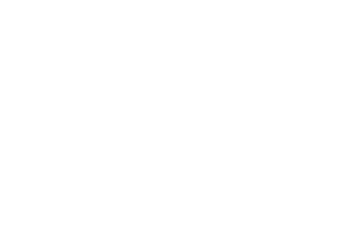

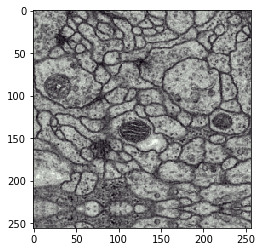

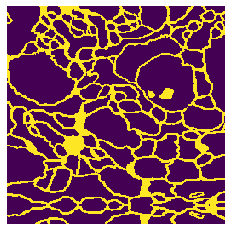

In [83]:
batch = 2
index = 0

X, y = datagen[batch]
plt.axis("off")
plt.figure(0)
plt.imshow(X[index].squeeze())
for i in range(1):
    if np.any(y[index, ..., i]):
        plt.figure(i + 2)
        plt.axis("off")
        plt.imshow(y[index, ..., i])

In [84]:
np.unique(y[0])

array([0., 1.], dtype=float32)

TypeError: Invalid shape (256, 256, 1) for image data

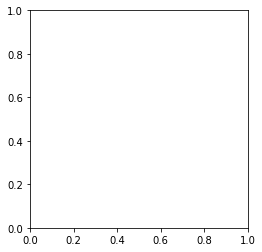

In [85]:
plt.imshow(y[0])

In [94]:
from models.UNet import UNet

model = UNet((256, 256, 1))

In [95]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [96]:
model.fit_generator(datagen, epochs=20, workers=6)

Epoch 1/20


ValueError: Error when checking input: expected input_6 to have shape (256, 256, 1) but got array with shape (256, 256, 3)

In [53]:
def f(x, y):
    return None

In [54]:
ole = {"x": 2, "y":23}
f(**ole)

TypeError: Invalid shape (256, 256, 20) for image data

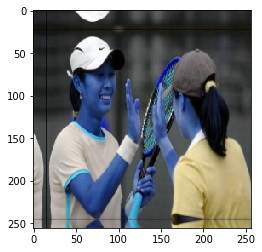

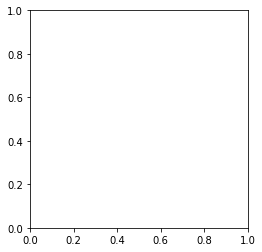

In [55]:
images_aug, segmaps_aug = datagen[1]

plt.imshow(images_aug[5])
plt.figure()
plt.imshow(segmaps_aug[5].squeeze(), vmin=0, vmax=1, cmap="gray")

In [97]:
import imgaug as ia
import imgaug.augmenters as iaa
import cv2

In [111]:
seq = iaa.Sequential([
    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25),
    iaa.Fliplr(0.5), # horizontally flip
    iaa.OneOf([
        iaa.Affine(rotate=(-10, 10), translate_percent={"x": (-0.25, 0.25)}, mode='reflect', cval=(255),
        backend="cv2")
    ]),
    # More as you want ...
])
seq_det = seq

In [112]:
src = datagen.source_pairs[0]
i, s = cv2.imread(src[0]), cv2.imread(src[1])

i2, s2 = seq_det(images=[s], segmentation_maps=[i])

In [118]:
segmap = ia.SegmentationMapOnImage(i, shape=s.shape, nb_classes=5)  # nb_classes should'nt matter

image_aug = seq_det.augment_image(s)
segmap_aug = seq_det.augment_segmentation_maps([segmap])[0]

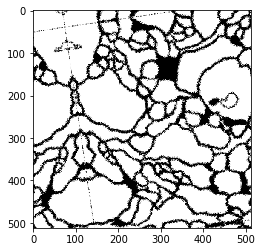

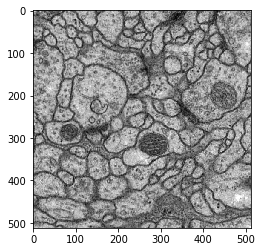

In [119]:
plt.imshow(image_aug)
plt.figure()
plt.imshow(i)

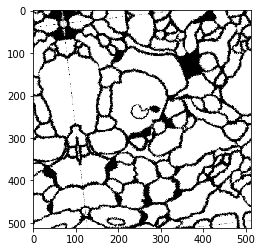

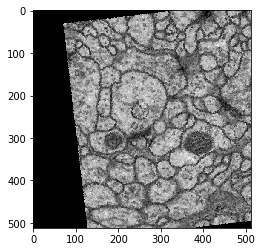

In [120]:
plt.imshow(i2[0])
plt.figure()
plt.imshow(s2[0])